In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
data = pd.read_csv("ckd.csv")

In [3]:
data.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [4]:
data = data.rename(columns={"Blood Glucose Random":"Glucose"})

In [5]:
data.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [6]:
data.shape

(158, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Glucose                  158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [8]:
data["Class"].value_counts(normalize=True)

0    0.727848
1    0.272152
Name: Class, dtype: float64

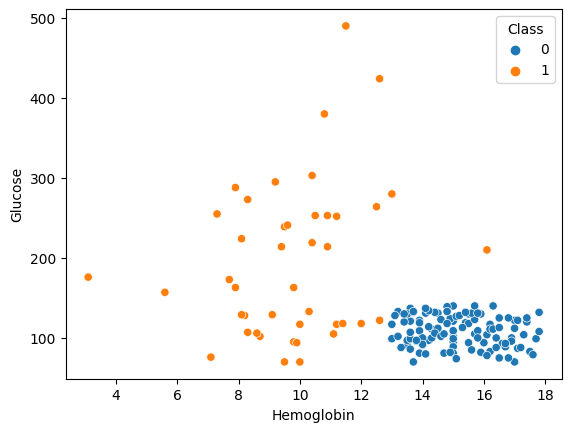

In [9]:
sns.scatterplot(x="Hemoglobin", y="Glucose", data=data, hue="Class")
plt.show()

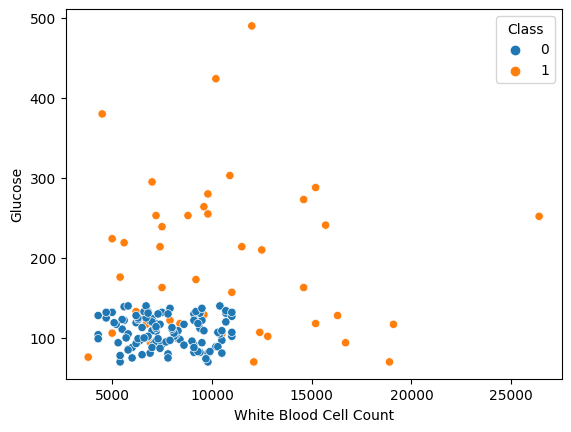

In [10]:
sns.scatterplot(x="White Blood Cell Count", y="Glucose", data=data, hue="Class")
plt.show()

In [11]:
y = data["Class"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [12]:
X = data.drop(columns="Class")
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Glucose                  158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [13]:
X = X[["Age", "Blood Pressure", "Specific Gravity", "Albumin", "Sugar", "Glucose", "Blood Urea", "Serum Creatinine", "Sodium", "Potassium", "Hemoglobin",
      "Packed Cell Volume", "White Blood Cell Count", "Red Blood Cell Count"]]
X.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
0,48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3.9
1,53,90,1.020,2,0,70,107,7.2,114,3.7,9.5,29,12100,3.7
2,63,70,1.010,3,0,380,60,2.7,131,4.2,10.8,32,4500,3.8
3,68,80,1.010,3,2,157,90,4.1,130,6.4,5.6,16,11000,2.6
4,61,80,1.015,2,0,173,148,3.9,135,5.2,7.7,24,9200,3.2


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [15]:
X_train.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
27,21,90,1.010,4,0,107,40,1.7,125,3.5,8.3,23,12400,3.9
111,43,60,1.025,0,0,108,25,1.0,144,5.0,17.8,43,7200,5.5
110,22,60,1.025,0,0,97,18,1.2,138,4.3,13.5,42,7900,6.4
85,43,80,1.025,0,0,81,46,0.6,135,4.9,13.9,48,6900,4.9
18,52,90,1.015,4,3,224,166,5.6,133,47.0,8.1,23,5000,2.9


In [16]:
X_test.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
7,73,70,1.005,0,0,70,32,0.9,125,4.0,10.0,29,18900,3.5
44,23,80,1.025,0,0,70,36,1.0,150,4.6,17.0,52,9800,5.0
113,29,80,1.020,0,0,83,49,0.9,139,3.3,17.5,40,9900,4.7
120,47,60,1.020,0,0,117,22,1.2,138,3.5,13.0,45,5200,5.6
63,30,80,1.025,0,0,96,25,0.5,144,4.8,13.8,42,9000,4.5


In [17]:
y_train.head()

27     1
111    0
110    0
85     0
18     1
Name: Class, dtype: int64

In [18]:
y_test.head()

7      1
44     0
113    0
120    0
63     0
Name: Class, dtype: int64

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((118, 14), (40, 14), (118,), (40,))

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
preds_train = knn.predict(X_train)

In [23]:
knn.score(X_train, y_train)

0.864406779661017

In [24]:
preds_test = knn.predict(X_test)

In [25]:
preds_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [26]:
y_test

7      1
44     0
113    0
120    0
63     0
122    0
121    0
139    0
109    0
92     0
24     1
141    0
26     1
60     0
80     0
97     0
129    0
98     0
142    0
56     0
45     0
33     1
59     0
8      1
40     1
37     1
101    0
19     1
144    0
108    0
51     0
54     0
16     1
130    0
134    0
22     1
93     0
66     0
112    0
94     0
Name: Class, dtype: int64

In [27]:
knn.score(X_test, y_test)

0.85